In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
from tqdm import tqdm

from aind_behavior_gym.dynamic_foraging.task import (CoupledBlockTask)
from aind_dynamic_foraging_models import generative_model
from aind_dynamic_foraging_models.generative_model import ForagerCollection
from aind_behavior_gym.dynamic_foraging.agent.random_agent import RandomAgent, RandomAgentBiasedIgnore


from aind_dynamic_foraging_models.generative_model.params import ParamsSymbols
from aind_dynamic_foraging_models.generative_model.params.util import get_params_options

from aind_dynamic_foraging_models.logistic_regression import (
    fit_logistic_regression, MODEL_MAPPER,
    plot_logistic_regression, exp_func, COLOR_MAPPER
)

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='hdmf.utils')


In [2]:
forager = ForagerCollection().get_preset_forager('Hattori2019', seed=42)
forager.set_params(
    softmax_inverse_temperature = 5,
    biasL = 0
)

# Set initial task environment for now
task = CoupledBlockTask(
    reward_baiting = True,
    num_trials = 1000,
    seed = 42
)

forager.params

ParamsModel(learn_rate_rew=0.5, learn_rate_unrew=0.1, forget_rate_unchosen=0.2, biasL=0.0, softmax_inverse_temperature=5.0)

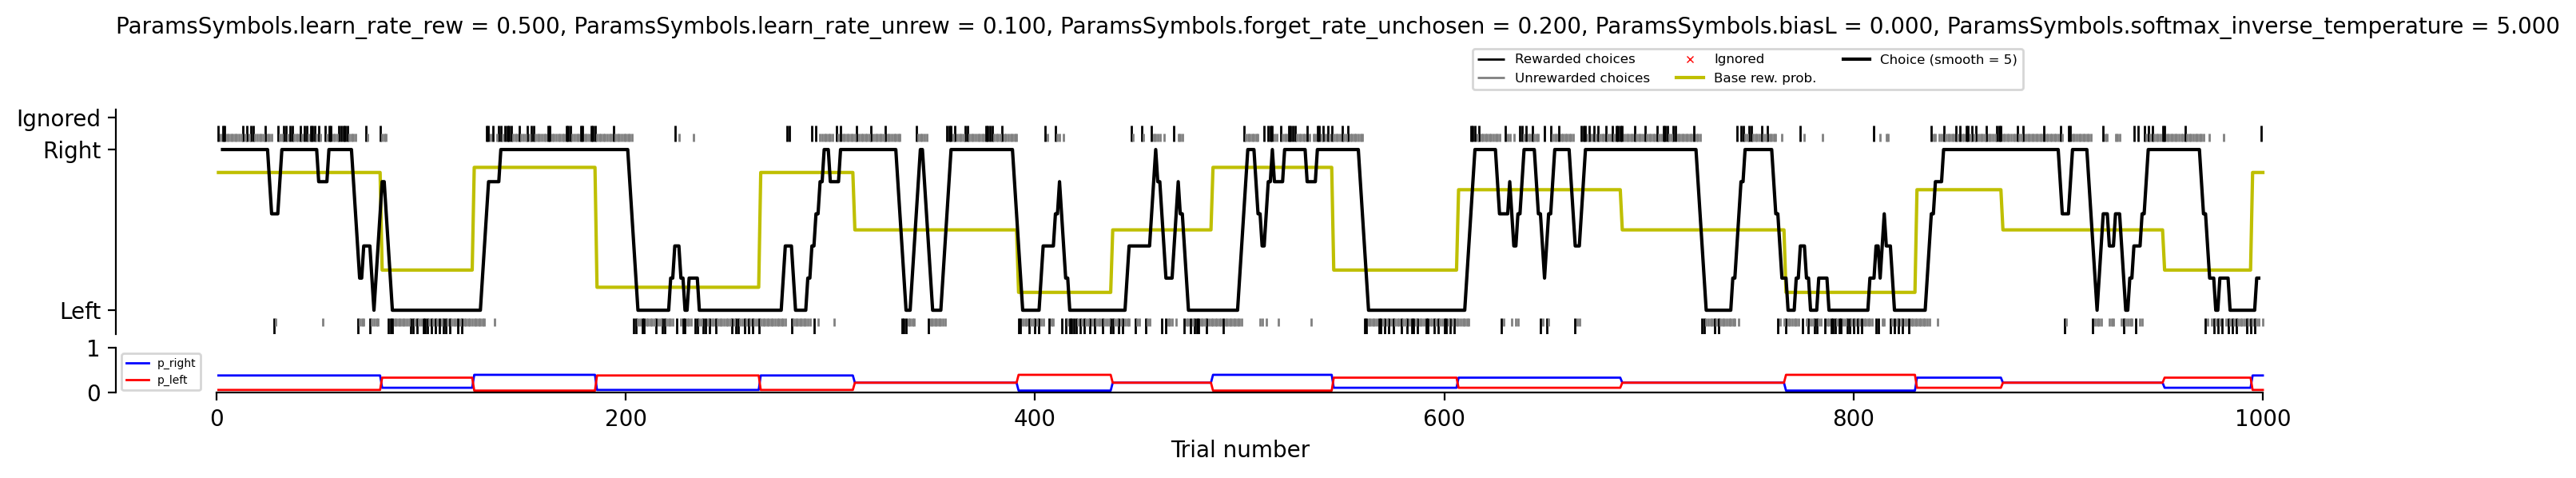

In [3]:
forager.perform(task)

choice_history = forager.get_choice_history()
reward_history = forager.get_reward_history()
p_reward = forager.get_p_reward()

fig, axes = forager.plot_session(if_plot_latent=False)

In [4]:
# Single fit trial

dict_logistic_result = fit_logistic_regression(choice_history, reward_history,
                                                   logistic_model = 'Su2022',
                                                   n_trial_back = 15, 
                                                   selected_trial_idx = None,
                                                   solver = 'liblinear',
                                                   penalty = 'l2',
                                                   Cs = 10,
                                                   cv = 10,
                                                   n_jobs_cross_validation = -1, 
                                                   n_bootstrap_iters = 1000,
                                                   n_bootstrap_samplesize = None)


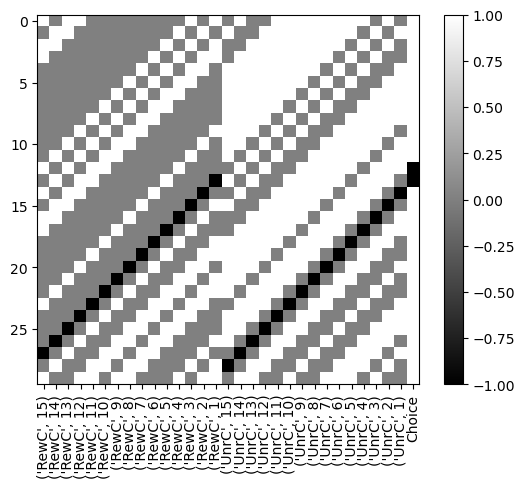

In [5]:
df_design = dict_logistic_result['df_design']

X = df_design.X.to_numpy()
Y = df_design.Y.to_numpy()
trials, var_names = df_design.index, df_design.X.columns

fig, ax = plt.subplots(1,1)
im = ax.imshow(np.concatenate([X[:30,:], Y[:30, :]], axis=1), cmap='gray')
ax.set_xticks(range(len(var_names) + 1))
ax.set_xticklabels(var_names.to_list() + ['Choice'], rotation=90)
fig.colorbar(im)
plt.show()

In [6]:
df_design

X                                               ...            \
var        RewC                                               ... UnrC        
trial_back   15   14   13   12   11   10    9    8    7    6  ...    9    8   
trial                                                         ...             
15          1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0   
16          0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0   
17          1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  1.0   
18          1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  1.0   
19          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  1.0   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
995         0.0 -0.0 -1.0 -0.0 -1.0 -0.0 -1.0 -0.0 -0.0 -0.0  ... -0.0 -1.0   
996        -0.0 -1.0 -0.0 -1.0 -0.0 -1.0 -0.0 -0.0 -0.0 -0.0  ... -1.0 -1.0   
997        -1.0 -0.0 -1.0 -0.0 -1.0 -0.0 -0.0 -0.0 -0.0 -1.0  ... -1.0 -1.0   
998        -0.0 -1.0 -0.0 -1.0 -0.0 -0.0 -0.0 -0.0 -1.0 -0.0  ... -1.0 -1.0   
999        -1.0 -0.0 -1.0 -0.0 -0.0 -0.0 -0.0 -1.0 -0.0 -1.0  ... -1.0 -0.0   

                                                   Y  
var                                           Choice  
trial_back    7    6    5    4    3    2    1      0  
trial                                                 
15          1.0  1.0  1.0  1.0  0.0  1.0  0.0    1.0  
16          1.0  1.0  1.0  0.0  1.0  0.0  1.0    1.0  
17          1.0  1.0  0.0  1.0  0.0  1.0  0.0    1.0  
18          1.0  0.0  1.0  0.0  1.0  0.0  0.0    1.0  
19          0.0  1.0  0.0  1.0  0.0  0.0  1.0    1.0  
...         ...  ...  ...  ...  ...  ...  ...    ...  
995        -1.0 -1.0 -1.0 -0.0 -1.0 -0.0 -1.0   -1.0  
996        -1.0 -1.0 -0.0 -1.0 -0.0 -1.0 -0.0   -1.0  
997        -1.0 -0.0 -1.0 -0.0 -1.0 -0.0 -1.0   -1.0  
998        -0.0 -1.0 -0.0 -1.0 -0.0 -1.0 -1.0    1.0  
999        -1.0 -0.0 -1.0 -0.0 -1.0 -1.0  0.0   -1.0  

[985 rows x 31 columns]

In [7]:
dict_logistic_result.keys()

dict_keys(['model', 'model_terms', 'n_trial_back', 'df_design', 'X', 'Y', 'df_beta', 'logistic_reg_cv', 'C', 'beta_bootstrap', 'df_beta_exp_fit'])

In [8]:
dict_logistic_result['df_beta']

cross_validation  bootstrap_mean  bootstrap_std  \
var  trial_back                                                    
RewC 15                  0.043253        0.022615       0.281189   
     14                  0.038015        0.040622       0.319501   
     13                  0.277196        0.295538       0.325550   
     12                  0.248126        0.259845       0.304021   
     11                  0.127584        0.136697       0.320426   
     10                 -0.194306       -0.225612       0.306831   
     9                   0.152214        0.183092       0.301313   
     8                   0.042729        0.052744       0.295899   
     7                   0.835715        0.891515       0.318755   
     6                   0.927428        0.998011       0.316667   
     5                   0.453797        0.504281       0.297908   
     4                   0.915108        0.983976       0.324876   
     3                   1.422222        1.504494       0.324969   
     2                   2.026008        2.147997       0.367887   
     1                   2.048405        2.208309       0.301254   
UnrC 15                  0.045986        0.029566       0.226574   
     14                  0.433986        0.481971       0.263229   
     13                  0.035793        0.044612       0.296438   
     12                 -0.242835       -0.269427       0.277744   
     11                  0.065674        0.074833       0.265103   
     10                 -0.427755       -0.449719       0.289487   
     9                   0.265433        0.290549       0.277403   
     8                   0.050316        0.049101       0.274826   
     7                   0.315440        0.335717       0.290665   
     6                  -0.163911       -0.168924       0.270318   
     5                   0.201528        0.217074       0.230933   
     4                   0.246389        0.252559       0.250442   
     3                   0.245898        0.253085       0.250973   
     2                  -0.104851       -0.117926       0.250590   
     1                   0.330105        0.367447       0.215544   
bias NaN                 0.041636        0.041044       0.124272   

                 bootstrap_CI_lower  bootstrap_CI_upper  
var  trial_back                                          
RewC 15                   -0.552862            0.552318  
     14                   -0.581969            0.717443  
     13                   -0.337100            0.924138  
     12                   -0.333833            0.850634  
     11                   -0.531155            0.725226  
     10                   -0.818431            0.354046  
     9                    -0.426651            0.761269  
     8                    -0.480556            0.660831  
     7                     0.315258            1.556570  
     6                     0.424956            1.680823  
     5                    -0.036828            1.105585  
     4                     0.402603            1.682347  
     3                     0.877578            2.163197  
     2                     1.477915            2.934877  
     1                     1.641574            2.821253  
UnrC 15                   -0.433585            0.457886  
     14                   -0.053851            0.978849  
     13                   -0.566821            0.606103  
     12                   -0.826252            0.260254  
     11                   -0.476337            0.579489  
     10                   -0.997222            0.115425  
     9                    -0.263974            0.823971  
     8                    -0.498457            0.583009  
     7                    -0.245868            0.888607  
     6                    -0.675250            0.400347  
     5                    -0.282500            0.677339  
     4                    -0.245507            0.739756  
     3                    -0.233030            0.731480  
     2                    -0.604

In [9]:
dict_logistic_result['df_beta_exp_fit']

var        amp                      tau               
stat    fitted standard_error    fitted standard_error
RewC  2.936953       0.349420  3.768726       0.555258
UnrC  0.258048       0.255071  5.636496       7.513098

<Axes: title={'center': 'Su2022, L2 penalty, best C = 2.78 from 10-fold CV\nscore $\\pm$ std = 0.886 $\\pm$ 0.063; CI from 1000 bootstraps'}, xlabel='Past trials', ylabel='Logistic regression coeffs'>

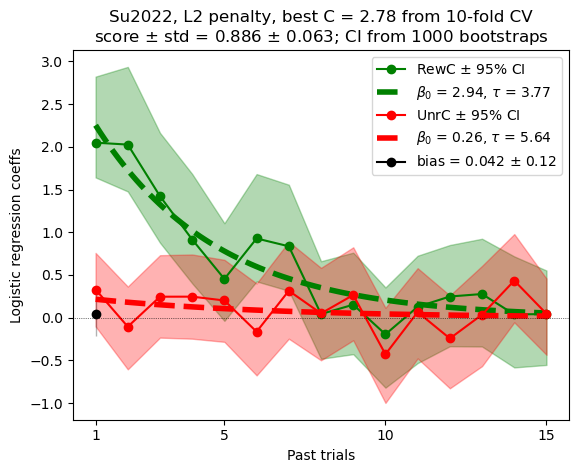

In [10]:
plot_logistic_regression(dict_logistic_result)